**Author**: CodeForAll  
**License**: MIT License

--- 


# 💡 LQR Control of Mass-Spring-Damper System

## 📘 Objective

Design a **Linear Quadratic Regulator (LQR)** to optimally control both **position and velocity** of a **mass-spring-damper system**, minimizing a defined cost function that penalizes state deviations and control effort.

---

## ⚙️ System Description

The mass-spring-damper system is modeled as a second-order system with:

- Mass $m$
- Damping coefficient $c$
- Spring constant $k$

The system’s differential equation is:

$$
m\ddot{x} + c\dot{x} + kx = u
$$

We rewrite this as a **state-space system**:

Let  
$x_1 = x \quad \text{(position)}, \qquad x_2 = \dot{x} \quad \text{(velocity)}$

Then, the system in state-space form is:

$$
\dot{x} = A x + B u
$$

where:

$$
A = \begin{bmatrix} 0 & 1 \\ -\frac{k}{m} & -\frac{c}{m} \end{bmatrix}, \quad
B = \begin{bmatrix} 0 \\ \frac{1}{m} \end{bmatrix}
$$

---

## 🧮 LQR Control

LQR seeks to minimize the **quadratic cost function**:

$$
J = \int_0^\infty (x^T Q x + u^T R u) \, dt
$$

Where:
- $Q \in \mathbb{R}^{n \times n}$ is a positive semi-definite matrix that weights the **state error**
- $R \in \mathbb{R}^{m \times m}$ is a positive definite matrix that weights the **control effort**

We select:

$$
Q = \begin{bmatrix} 100 & 0 \\ 0 & 10 \end{bmatrix}, \quad
R = \begin{bmatrix} 1 \end{bmatrix}
$$

This means:
- We heavily penalize deviations in **position**
- We moderately penalize deviations in **velocity**
- We lightly penalize the **actuation effort**

The **optimal state feedback gain** is computed by:

$$
K = R^{-1} B^T P
$$

where $P$ is the solution to the **Continuous Algebraic Riccati Equation (CARE)**:

$$
A^T P + P A - P B R^{-1} B^T P + Q = 0
$$

---

## 🔁 Closed-Loop System

The control input is:

$$
u = -Kx
$$

So the closed-loop dynamics become:

$$
\dot{x} = (A - B K) x
$$

We simulate this closed-loop system's behavior from an initial displacement of $x_1 = 1$ m and $x_2 = 0$ m/s.

---

## 🧪 Python Simulation

We implement the experiment in Python using the `control` library:

- Build the state-space system
- Use `control.lqr()` to compute $K$
- Simulate with `control.initial_response()`

---

## 📊 Result

The simulation shows:
- Position $x(t)$ smoothly returns to zero
- Velocity $\dot{x}(t)$ is quickly damped out
- Control is smooth and doesn't overshoot excessively

---

## ✅ Conclusion

This experiment demonstrates how **LQR** can be used to design an optimal controller that **balances multiple goals**:
- Stabilizing position,
- Regulating velocity,
- Minimizing control effort.

By tuning $Q$ and $R$, we can customize the behavior of the system to meet different control objectives.


LQR Gain K: [[4.14213562 3.39138603]]


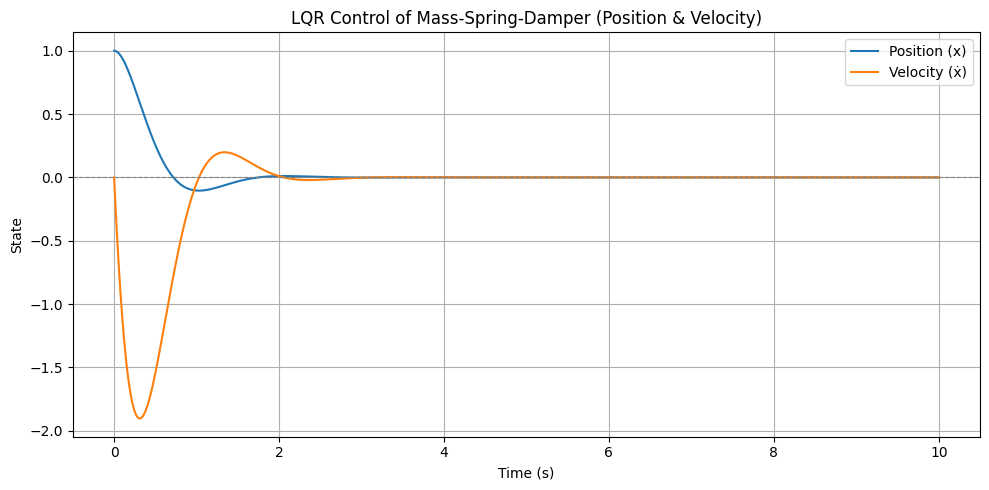

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control

# System parameters
m = 1.0   # mass (kg)
k = 10.0  # spring constant (N/m)
c = 1.0   # damping coefficient (N·s/m)

# State-space representation
# x1 = position, x2 = velocity
A = np.array([[0, 1],
              [-k/m, -c/m]])
B = np.array([[0],
              [1/m]])
C = np.eye(2)  # to observe both position and velocity
D = np.array([[0],
              [0]])

# Create the state-space system
sys = control.ss(A, B, C, D)

# Define cost function weights (Q penalizes states, R penalizes control)
Q = np.array([[100, 0],   # Penalize position heavily
              [0, 10]])   # Penalize velocity moderately
R = np.array([[1]])       # Penalize control effort

# Compute LQR gain
K, S, E = control.lqr(sys, Q, R)
print("LQR Gain K:", K)

# Closed-loop system dynamics: A_cl = A - B*K
A_cl = A - B @ K
sys_cl = control.ss(A_cl, B, C, D)

# Time vector and initial condition
T = np.linspace(0, 10, 500)
x0 = [1.0, 0.0]  # initial position = 1m, velocity = 0 m/s

# Simulate system response with initial condition
T, yout = control.initial_response(sys_cl, T, X0=x0)

# Plotting results
plt.figure(figsize=(10, 5))
plt.plot(T, yout[0], label='Position (x)')
plt.plot(T, yout[1], label='Velocity (ẋ)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("LQR Control of Mass-Spring-Damper (Position & Velocity)")
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
